## Backtesting Introduction

*Coding along with the Udemy Couse [Machine Learning Applied to Stock & Crypto Trading](https://www.udemy.com/course/machine-learning-applied-to-stock-crypto-trading-python/) by Shaun McDonogh.*

#### Imports

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#### Data Extraction

In [2]:
# Data extraction
start_date = "2017-01-01"
end_date = "2022-06-01"
# ticker: SPDR S&P 500 ETF Trust (SPY)
# https://finance.yahoo.com/quote/SPY/
symbol = "SPY"
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head(3)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2017-01-03,197.952881,225.240005,225.830002,223.880005,225.039993,91366500
2017-01-04,199.130524,226.580002,226.750000,225.610001,225.619995,78744400
2017-01-05,198.972336,226.399994,226.580002,225.479996,226.270004,78379000


In [4]:
# explicitly renaming the columns
# when we want to add columns at a later step with loc and a conditional we're running into an index error 
# if we stay with two index levels (or a nested index)
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-01-03,197.952881,225.240005,225.830002,223.880005,225.039993,91366500
2017-01-04,199.130524,226.580002,226.750000,225.610001,225.619995,78744400
2017-01-05,198.972336,226.399994,226.580002,225.479996,226.270004,78379000
2017-01-06,199.684219,227.210007,227.750000,225.899994,226.529999,71559900
2017-01-09,199.025070,226.460007,227.070007,226.419998,226.910004,46939700


#### Feature Adjustments

The simple strategy for this example is the `moving average crossover`. The backtesting that we'll apply to the moving average crossover strategy, can be used for any other methodology.

The focus is on creating signals, and this can be done any way you want.

***The strategy here is,***

- ***if the moving average of the 12-day is greater than the 21-day, then it's a go long signal,***
 
- ***otherwise it's a do nothing signal.***

The buy signal is set to the next day with `df["Signal"].shift(1)`.

You need to be very careful to not include any *look ahead bias* when you are setting the signal for your strategy. *Look ahead bias* means that you're including assumptions that you have information about the future in your trading.

In [5]:
# adding one simple strategy: moving averages crossover
# add moving averages with pandas' rolling().mean()
df["MA_12"] = df["Adj Close"].rolling(window=12).mean() # 12 day MA
df["MA_21"] = df["Adj Close"].rolling(window=21).mean() # 21 day MA

In [6]:
df

,Adj Close,Close,High,Low,Open,Volume,MA_12,MA_21
Date,,,,,,,,
2017-01-03,197.952881,225.240005,225.830002,223.880005,225.039993,91366500,NaN,NaN
2017-01-04,199.130524,226.580002,226.750000,225.610001,225.619995,78744400,NaN,NaN
2017-01-05,198.972336,226.399994,226.580002,225.479996,226.270004,78379000,NaN,NaN
2017-01-06,199.684219,227.210007,227.750000,225.899994,226.529999,71559900,NaN,NaN
2017-01-09,199.025070,226.460007,227.070007,226.419998,226.910004,46939700,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-24,379.407379,393.890015,395.149994,386.959991,392.559998,91448800,381.619540,390.452372
2022-05-25,382.759369,397.369995,399.450012,391.890015,392.309998,91472900,381.555323,389.593263
2022-05-26,390.407410,405.309998,407.040009,398.450012,398.670013,82168300,382.054596,389.044681


In [7]:
df.loc[df["MA_12"] > df["MA_21"], "Signal"] = 1 # MA 21 above MA 21
df.loc[df["MA_12"] <= df["MA_21"], "Signal"] = 0
# the buy signal is set to the next day with df["Signal"].shift(1)
df["Signal"] = df["Signal"].shift(1)

In [8]:
df.head(40)

,Adj Close,Close,High,Low,Open,Volume,MA_12,MA_21,Signal
Date,,,,,,,,,
2017-01-03,197.952881,225.240005,225.830002,223.880005,225.039993,91366500,NaN,NaN,NaN
2017-01-04,199.130524,226.580002,226.750000,225.610001,225.619995,78744400,NaN,NaN,NaN
2017-01-05,198.972336,226.399994,226.580002,225.479996,226.270004,78379000,NaN,NaN,NaN
2017-01-06,199.684219,227.210007,227.750000,225.899994,226.529999,71559900,NaN,NaN,NaN
2017-01-09,199.025070,226.460007,227.070007,226.419998,226.910004,46939700,NaN,NaN,NaN
2017-01-10,199.025070,226.460007,227.449997,226.009995,226.479996,63771900,NaN,NaN,NaN
2017-01-11,199.587540,227.100006,227.100006,225.589996,226.360001,74650000,NaN,NaN,NaN
2017-01-12,199.086578,226.529999,226.750000,224.960007,226.500000,72113200,NaN,NaN,NaN
2017-01-13,199.543564,227.050003,227.399994,226.690002,226.729996,62717900,NaN,NaN,NaN


When you're doing backtesting, what we care about is the __benchmark__ which will be `buy and hold`.

*The question that we will ask is, if our strategy beat buy and hold?*

So if we bought at the `Close` at the start of our data and I sold at the `Close` all the way at the end of our data, what was our return and would we have beat that with our strategy?

In [9]:
# Add Returns
# firest calculating log returns
df["lrets_bench"] = np.log(df["Adj Close"] / df["Adj Close"].shift(1))
# calculating the cumulative sum
df["lrets_prod_bench"] = df["lrets_bench"].cumsum()
# normalizing the returns, reversing the log
df["prod_bench"] = np.exp(df["lrets_prod_bench"]) - 1
df.head()

,Adj Close,Close,High,Low,Open,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2017-01-03,197.952881,225.240005,225.830002,223.880005,225.039993,91366500,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,199.130524,226.580002,226.750000,225.610001,225.619995,78744400,NaN,NaN,NaN,0.005931,0.005931,0.005949
2017-01-05,198.972336,226.399994,226.580002,225.479996,226.270004,78379000,NaN,NaN,NaN,-0.000795,0.005137,0.005150
2017-01-06,199.684219,227.210007,227.750000,225.899994,226.529999,71559900,NaN,NaN,NaN,0.003571,0.008708,0.008746
2017-01-09,199.025070,226.460007,227.070007,226.419998,226.910004,46939700,NaN,NaN,NaN,-0.003306,0.005402,0.005416


In [10]:
# add/compute the strategy returns
df["lrets_strat"] = np.log(df["Open"].shift(-1) / df["Open"]) * df["Signal"]
df["lrets_prod_strat"] = df["lrets_strat"].cumsum()
df["prod_strat"] = np.exp(df["lrets_prod_strat"]) - 1
df.tail(5)

,Adj Close,Close,High,Low,Open,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2022-05-24,379.407379,393.890015,395.149994,386.959991,392.559998,91448800,381.619540,390.452372,0.0,-0.007663,0.650581,0.916655,-0.0,0.211001,0.234914
2022-05-25,382.759369,397.369995,399.450012,391.890015,392.309998,91472900,381.555323,389.593263,0.0,0.008796,0.659377,0.933588,0.0,0.211001,0.234914
2022-05-26,390.407410,405.309998,407.040009,398.450012,398.670013,82168300,382.054596,389.044681,0.0,0.019784,0.679162,0.972224,0.0,0.211001,0.234914
2022-05-27,399.991577,415.260010,415.380005,407.700012,407.910004,84768700,383.861460,388.469035,0.0,0.024253,0.703414,1.020640,0.0,0.211001,0.234914
2022-05-31,397.747223,412.929993,416.459991,410.029999,413.549988,95937000,385.514203,388.511691,0.0,-0.005627,0.697788,1.009303,NaN,NaN,NaN


In [11]:
# remove NaN's
df.dropna(inplace=True)

In [12]:
# review DataFrame
print("DF Length: ", len(df))
df

DF Length:  1340


,Adj Close,Close,High,Low,Open,Volume,MA_12,MA_21,Signal,lrets_bench,lrets_prod_bench,prod_bench,lrets_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2017-02-02,200.176346,227.770004,228.100006,226.820007,227.619995,69657600,200.048186,199.689221,1.0,0.000659,0.011170,0.011232,0.005258,0.005258,0.005272
2017-02-03,201.556137,229.339996,229.550003,228.460007,228.820007,80563200,200.237869,199.804726,1.0,0.006869,0.018039,0.018203,0.000218,0.005477,0.005492
2017-02-06,201.195847,228.929993,229.330002,228.539993,228.869995,57790100,200.459049,199.910607,1.0,-0.001789,0.016250,0.016383,0.002226,0.007702,0.007732
2017-02-07,201.204620,228.940002,229.660004,228.720001,229.380005,57931200,200.620174,199.983008,1.0,0.000044,0.016293,0.016427,-0.001920,0.005782,0.005799
2017-02-08,201.468307,229.240005,229.389999,228.309998,228.940002,51566200,200.846481,200.099352,1.0,0.001310,0.017603,0.017759,0.001310,0.007092,0.007117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,382.325897,396.920013,397.730011,390.380005,392.829987,76414900,383.020236,392.040325,0.0,0.018537,0.658244,0.931399,-0.000000,0.211001,0.234914
2022-05-24,379.407379,393.890015,395.149994,386.959991,392.559998,91448800,381.619540,390.452372,0.0,-0.007663,0.650581,0.916655,-0.000000,0.211001,0.234914
2022-05-25,382.759369,397.369995,399.450012,391.890015,392.309998,91472900,381.555323,389.593263,0.0,0.008796,0.659377,0.933588,0.000000,0.211001,0.234914


#### Plotting Results and Metrics of Backtesting

An __equity curve__ is a graphical representation of the change in the value of a trading account over a time period. An equity curve with a consistently positive slope typically indicates that the trading strategies of the account are profitable, while a negative slope shows that they are generating a negative return (https://www.investopedia.com/terms/e/equity-curve.asp).

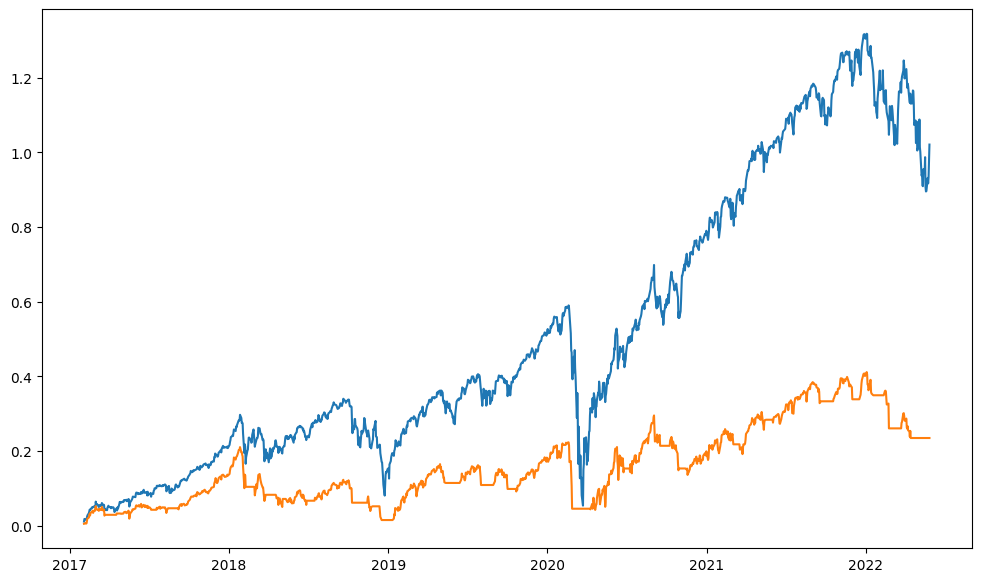

In [13]:
# Show Graph
fig = plt.figure(figsize=(12, 7))
plt.plot(df["prod_bench"]) # blue line
plt.plot(df["prod_strat"]) # orange line
plt.show()

***If we would just have bought and held we can see that the returns would have been over 100% here for the S&P (blue line).***

***If we would have done our strategy of going long long with the moving average crossover our returns would have been somewhere around this 20% (orange line).***

#### Metrics

In [14]:
# Calculate Returns
print("Benchmark Returns: ", df["prod_bench"].iloc[-1])
print("Strategy Returns: ", df["prod_strat"].iloc[-1])

Benchmark Returns:  1.0206403433582292
Strategy Returns:  0.23491408583051498


The Sharpe ratio compares the return of an investment with its risk. It's a mathematical expression of the insight that excess returns over a period of time may signify more volatility and risk, rather than investing skill (https://www.investopedia.com/terms/s/sharperatio.asp). 

In [15]:
# Calculate Sharpe
def calculate_sharpe(returns):
    N = 255 # trading days per year
    rf = 0.01 # risk free rate
    SQRTN = np.sqrt(N)
    mean = returns.mean() * N
    sigma = returns.std() * SQRTN
    sharpe = round((mean - rf) / sigma, 3)
    return sharpe

In [16]:
# Show Sharpe
bench_sharpe = calculate_sharpe(df["lrets_bench"].values)
strat_sharpe = calculate_sharpe(df["lrets_strat"].values)
print("Benchmark Sharpe: ", bench_sharpe)
print("Strategy Sharpe: ", strat_sharpe)

Benchmark Sharpe:  0.619
Strategy Sharpe:  0.251


We would want our sharpe ratio to be above one to know that we're doing well. If you can get a sharp ratio about or above 1.5 you're doing very well. And it might also mean that you're getting less returns, but it also means *there's a lot less risk in your strategy*.

According to the course instructor both vakues are absolutely terrible. Even though our returns were fairly good, our Sharpe ratio is not good at all. It's not good for the benchmark and it's even worse for our strategy.